In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

from matplotlib import cm

""" import the Tilings package... """
import sys
sys.path.insert(0, '../Tilings') # prepend the path to the Tiling package
import Tilings as tl
import Penrose_envs as envs

%matplotlib inline  

In [2]:
e = envs.e
orig = 0
init_shapes = envs.loz(0, -e[1], -e[4])

ninfl = 7
approx = tl.Penrose(init_shapes)
approx.it_sub(ninfl)
planes = approx.planes()
lift = approx.lift()

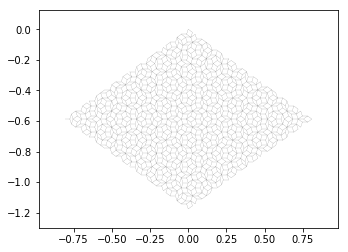

In [3]:
pos = {p:(p.real, p.imag) for p in approx._graph}
s = 0.
nx.draw_networkx(approx._graph, pos, with_labels=False,
                 node_size=s, width=.1)
plt.axes().set_aspect('equal')

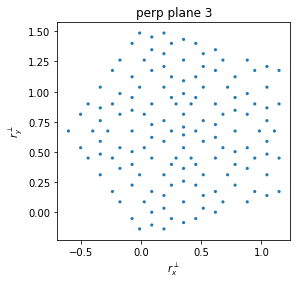

In [4]:
# index of the plane we want to plot
i = 3
# retrive position
x, y = np.transpose([np.dot(approx._perp, lift[p]) for p in planes[i]])
s = 10.
plt.scatter(x, y, s=s, edgecolor='', cmap="inferno", alpha=1.)

# axes labels
plt.xlabel(r"$r^\perp_x$")
plt.ylabel(r"$r^\perp_y$")
plt.title("perp plane " + str(i))
plt.axes().set_aspect('equal')